# Machine Learning Capstone Project

## SVM Classifier

### 1. Import required packages

In [1]:
from helper_functions import unpickle, extract_data, load_data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from time import time
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

### 2. Extract CIFAR 15

In [2]:
(X_train, y_train), (X_test, y_test) = load_data('cifar-15-python', 'fine')
print('Training Data Shape  :', X_train.shape)
print('Training Label Shape :', y_train.shape)
print('Testing Data Shape   :', X_test.shape)
print('Testing Label Shape  :', y_test.shape)

Training Data Shape  : (7500, 32, 32, 3)
Training Label Shape : (7500, 1)
Testing Data Shape   : (1500, 32, 32, 3)
Testing Label Shape  : (1500, 1)


### 3. Preprocessing Data

In [3]:
def convertToGray(input_dataset, output_dataset):
    i = 0
    for img in input_dataset:
        output_dataset[i] = np.dot(img[...,:3], [0.299, 0.587, 0.114])
        i += 1    

In [4]:
X_train_gray = np.zeros((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test_gray = np.zeros((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Convert to gray
convertToGray(X_train, X_train_gray)
convertToGray(X_test, X_test_gray)

# Reshape the image data into rows
X_train_gray = np.reshape(X_train_gray, (X_train_gray.shape[0], -1)) 
X_test_gray = np.reshape(X_test_gray, (X_test_gray.shape[0], -1))

# Normalize the data
#mid_value = 127.5
mid_value = 0.0
max_value = 255.0
X_train_gray = (X_train_gray - mid_value)/max_value
X_test_gray = (X_test_gray - mid_value)/max_value

# Reshape image label into 1D array
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

print('Training Data Shape  :', X_train_gray.shape)
print('Training Label Shape :', y_train.shape)
print('Testing Data Shape   :', X_test_gray.shape)
print('Testing Label Shape  :', y_test.shape)

Training Data Shape  : (7500, 1024)
Training Label Shape : (7500,)
Testing Data Shape   : (1500, 1024)
Testing Label Shape  : (1500,)


### 4. Train the classifier

In [5]:
t1 = time()
clf = SVC(C = 1.0, kernel = 'rbf')
clf.fit(X_train_gray, y_train)
dt = time() - t1
print('Time to train SVM is', dt, 'seconds.' )

Time to train SVM is 122.11652946472168 seconds.


### 5. Accuracy of the classifier on test set

In [6]:
acc = clf.score(X_test_gray, y_test)
print('Accuracy of the SVM classifier is', acc*100, '%')

Accuracy of the SVM classifier is 25.7333333333 %


### 6. Confusion matrix

/home/aind2/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


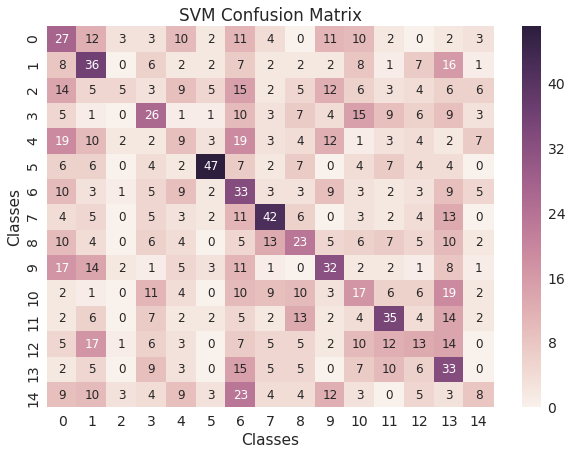

In [7]:
y_pred = clf.predict(X_test_gray)

cm = confusion_matrix(y_test, y_pred)
#print(cm)
df_cm = pd.DataFrame(cm, range(15), range(15))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})
plt.title('SVM Confusion Matrix')
plt.xlabel('Classes')
plt.ylabel('Classes')
plt.show()